<a href="https://colab.research.google.com/github/liofval/GCI/blob/main/GCI%E3%83%98%E3%82%99%E3%83%BC%E3%82%B7%E3%83%83%E3%82%AF_%E6%BC%94%E7%BF%92_%E5%88%86%E9%A1%9E%E3%82%B3%E3%83%BC%E3%82%B9_%E3%83%AC%E3%83%98%E3%82%99%E3%83%AB%EF%BC%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **分類コース**


---


分類コースでは、**データのカテゴリーを予測する機械学習モデル「決定木」**を取り扱い、**「データの理解→データの前処理→モデルの構築・評価」**という一連の流れを通して、各レベルに応じてデータ分析に必要な知識の習得を目指します。

#レベル２（★★☆☆☆）
---
レベル２では、欠損値を補完したデータを使用し、予測モデルを構築してみましょう。どのような値で欠損値を補完するのがよいのでしょうか。レベル２では、2つの方法で欠損値の補完を実践してみます。


##2.1.データの理解①

レベル２の演習においても、レベル1で利用した「毒キノコの外観データ」を使用します。レベル１の復習もかねて、下記URLからダウンロードしてファイルを所定の位置にアップロードし、次のコードでデータフレームに読み込んでみましょう。


[毒キノコの外観データ.csv](https://drive.google.com/file/d/18oIhPQ4iOYoVolKMjzt1Kyek0x_WhSEW/view?usp=drive_link)

In [ ]:
#pandasのインポート
import pandas as pd

#CSVファイルの読み込み
df = pd.read_csv('毒キノコの外観データ.csv')


今回は、全データの特徴を1つの値で表す**代表値**について確認します。代表値とは、そのデータ分布の特徴を表す値を指し、**平均値**や**中央値**、**最頻値**（さいひんち）が代表値です。数値や順序のある量的データであれば、平均値や中央値が利用できますが、今回は質的データであるため、最頻値を利用して欠損値を補完します。最頻値とは、データの中でも最も多く現れる値を指します。

DataFrameオブジェクトの特定列の代表値などの統計情報を調べたい場合、列を指定してSeriesオブジェクトを抽出し、さらに、describeメソッドを使用します。下のコードでは、欠損値のあるbruisesの列を抽出し、describeメソッドを使用して返ってくるSeriesオブジェクトを表示しています。

In [ ]:
df['bruises'].describe()

表示結果のインデックスにあるcountは欠損値を除くデータの個数、uniqueは種類の数、topは最頻値、freqは最頻値の数を示します。bruisesは、質的データのため、最頻値などの統計量が得られましたが、量的データの場合、平均値や中央値の代表値の他、標準偏差などの統計量も得られます。

In [ ]:
top = df['bruises'].describe()['top']
top

describeメソッドから返されるSeriesオブジェクトに対して、インデックスを角かっこで指定すると対応する値を参照できます。最頻値の場合、`['top']`と指定します。参照結果から全データにおいて`['bruises']`列では、斑点の無いデータ（N）が最も多いと分かります。

##2.2.データの前処理①

代表値を使ってデータの前処理を実行します。レベル１では、欠損値があるときの対処法として、欠損値のある列ごと削除する方法と欠損値のある行だけ削除する方法を紹介しました。レベル２では、欠損値を削除するのではなく、代表値（最頻値）で補完します。補完方法には、そのまま欠損値の列の代表値で補完する方法や他の列を参照して補完する方法があります。

**【欠損値処理】**

*   欠損値の削除（レベル１★☆☆）
    *   欠損列の削除
    *   欠損行の削除
*   欠損値の補完（レベル２★★☆）
    *   欠損列の代表値で補完
    *   欠損列以外の列を参照して補完

それでは、まず、欠損列の最頻値で補完してみましょう。欠損値の補完はDataFrameオブジェクトのfillnaメソッドを使用し、かっこ内に補完する値、今回は最頻値を代入します。isnullメソッドとsumメソッドを使用し、補完後、欠損値がないことを確認できます。fillnaメソッドを使用すると欠損値を埋めたDataFrameオブジェクトが返されるため、新たにdf_fillという変数に代入しています。

In [ ]:
#最頻値で欠損値補完
df_fill = df.fillna(top)
#欠損値の数を確認
df_fill.isnull().sum()

なお、fillnaメソッドでは、元のDataFrameオブジェクトからは欠損値は除かれません。元の変数dfに欠損値が残っているのを確認してみましょう。

In [ ]:
#元のdfの欠損値数を確認
df.isnull().sum()

あとは、これまでどおり、ダミー変数化し、訓練データとテストデータに分割します。

In [ ]:
df_dummy = pd.get_dummies(df_fill[['cap_color', 'bruises']], drop_first= True)

x = df_dummy
y = df_fill['poison']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

>**[訓練データとテストデータの分割するタイミング]**
>
>今回は、最頻値でデータを補完したのち、訓練データとテストデータに分割しました。しかし、これはあまり推奨されない方法です。なぜなら、分割前に最頻値で補完しているため、最頻値という情報は、テストデータからも得た情報となります。テストデータに含まれる情報で補完して予測精度を評価しても、未知のデータの正確な評価ではないため、精度を過大評価する可能性があるためです。今回の代表値の例では、先に分割しても後に分割しても、データに偏りがなければ最頻値が変わらないため、結果は同じとなります。しかし、実際のケースでは、テストデータの情報を利用しないように注意が必要です。

##2.3.モデルの構築と評価①

それでは、データの準備が整いましたので、これまでどおり、モデルの構築と評価をしてみましょう。

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

test_score = model.score(x_test, y_test)
round(test_score, 3)

最頻値で補完した場合、欠損値のある行データを削除したときよりわずかに精度が下がってしまいましたが、欠損列を削除したときより精度が高いことが分かります。欠損値補完により、これから得られる未知のデータに欠損値が含まれていても予測が可能となりました。次に、欠損値のない他の特徴量も参照して欠損値を補完する方法を紹介します。

##2.4.データの理解②

前回は、全てのデータにおける最頻値で欠損値を補完しました。しかし、データによっては、特徴量同士に関係性を持つ可能性があります。例えば、白いキノコであれば斑点ありの傾向があるなどです。前回は、そのような関係を無視して欠損値を最頻値でいっかつに補完していました。今回は、色をグループに分けて斑点の最頻値を見てみましょう。

DataFrameオブジェクトのgroupbyメソッドを使用すると、特定の列に基づいて同じ値を持つ行をグループにまとめて計算できます。グループ分けしたい列をかっこ（）内に指定し、計算したい列をかっこの後ろに指定します。さらに、describeメソッドを使用すると各グループをインデックス、統計量をカラムに持つDataFrameオブジェクトが得られます。`['top']`としてカラム名を指定して各グループの最頻値を抽出した結果が以下の通りです。イメージは下図のとおりです。

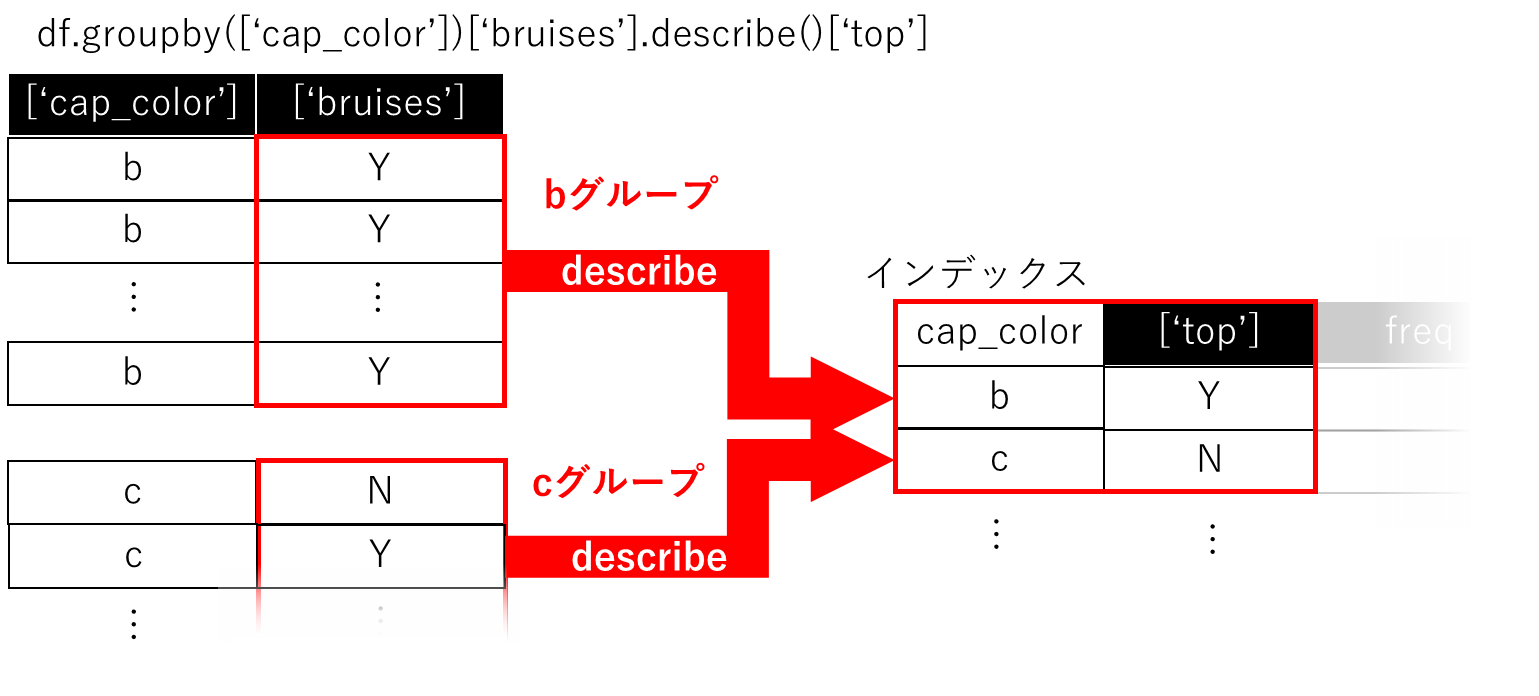

In [ ]:
tops = df.groupby(['cap_color'])['bruises'].describe()['top']
tops

集計の結果、キノコの色（cap_color）によって斑点の有無（bruisesの最頻値）が変わっているのが分かります。そこで、次の欠損値補完では、cap_colorの種類ごとに補完する最頻値を変えてみましょう。

##2.5.データの前処理②

今回は、cap_colorの種類に応じて、欠損値のあるデータを補完する必要があります。DataFrameオブジェクトの特定行や特定の行と列を参照・代入するにはloc属性が使用できます。まず、欠損値のあるデータだけ抽出してみましょう。欠損行を抽出するには、loc属性の[]の中に、欠損値の真偽値のSeriesオブジェクトを渡します。欠損値の真偽値のSeriesオブジェクトは、isnullメソッドで確認できることをレベル1で紹介しました。違いとしては、今回は、データフレームの全ての列の欠損値を知りたいわけではないため、bruisesの列を指定したSeriesオブジェクトに対してisnullメソッドを使用しています。

In [ ]:
is_null = df['bruises'].isnull()
is_null.head()

In [ ]:
df.loc[is_null].head()

isnullメソッドでTrueと評価された欠損値の行だけloc属性で抽出できました。次に、cap_colorの色ごとに分けてデータを選択してみましょう。まず、最初の5行の色を確認します。

In [ ]:
df['cap_color'].head()

インデックス2と3の行がw（white）だと確認できます。

まず、欠損値のときのようにその色と同じかどうかの真偽値のSeriesオブジェクトを作成し、その後にloc属性で抽出してみましょう。同じかどうかを比べるには、2つのイコール記号（`==`）の比較演算子を使用します。今回は、cap_colorの列を指定し、2つのイコール記号（==）を挟んで、比べたい色`'w'`（白色）を記入します。比較演算子の評価後、真偽値のSeriesオブジェクトとなり、変数is_whiteに代入されています。

In [ ]:
is_white = df['cap_color'] == 'w'
is_white.head()

whiteであった行だけ、Trueそれ以外はFalseと評価されます。欠損値のときのようにloc属性に真偽値のSeriesオブジェクトを渡すと、Trueのデータを抽出できます。

In [ ]:
df.loc[is_white].head()

それでは、色と欠損値の条件を組み合わせて抽出してみましょう。2つの条件を同時に満たす場合は`&`記号を使用します。

In [ ]:
df.loc[is_null & is_white].head()

なお、条件のどちらかを満たす場合は `|` 記号を使用します。2つの真偽値のSeriesオブジェクトAとB
がある場合、以下のような結果となります。

SeriesA| SeriesB |SeriesA & SeriesB| SeriesA \| SeriesB
------|------|--|--|
True | True  |True|True|
True | False  |False|True|
False | True  |False|True|
False | False  |False| False|

これでcap_colorがwhiteで欠損値のあるデータだけが抽出できました。さらに欠損値のある列だけ抽出したい場合は、loc属性の[]内にカンマを入れて、その後ろに列名を指定します。

In [ ]:
df.loc[is_white & is_null,'bruises'].head()

欠損値のデータだけ抜き出すことができました。最後に欠損値に色のグループで分けた最頻値を代入します。代入する値は、変数topsに対して各インデックスを指定して参照した最頻値です。ここでは、色の条件確認をloc属性の中に入れてまとめています。この際、条件式はかっこで囲む必要があります。

In [ ]:
df.loc[(df['cap_color'] == 'b') & (is_null),'bruises'] = tops['b']
df.loc[(df['cap_color'] == 'c') & (is_null),'bruises'] = tops['c']
df.loc[(df['cap_color'] == 'e') & (is_null),'bruises'] = tops['e']
df.loc[(df['cap_color'] == 'g') & (is_null),'bruises'] = tops['g']
df.loc[(df['cap_color'] == 'n') & (is_null),'bruises'] = tops['n']
df.loc[(df['cap_color'] == 'p') & (is_null),'bruises'] = tops['p']
df.loc[(df['cap_color'] == 'r') & (is_null),'bruises'] = tops['r']
df.loc[(df['cap_color'] == 'u') & (is_null),'bruises'] = tops['u']
df.loc[(df['cap_color'] == 'w') & (is_null),'bruises'] = tops['w']
df.loc[(df['cap_color'] == 'y') & (is_null),'bruises'] = tops['y']

あとは、これまで通り、データを訓練データとテストデータに分割し、モデルを学習させましょう。

In [ ]:
df_dummy = pd.get_dummies(df[['cap_color', 'bruises']], drop_first= True)

x = df_dummy
y = df['poison']

x_train, x_test, y_train, y_test = train_test_split(x, y)

##2.6. モデルの構築と評価②

学習方法はこれまでと同じです。

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

test_score = model.score(x_test, y_test)
round(test_score, 3)

今回は、欠損値補完の方法による変化はありませんでしたが、データによって変わる可能性があります。また、今回は取り扱いませんでしたが、欠損値をラベルとして予測するという方法もあります。つまり、決定木を2回利用して、予測することになります。以上で欠損値処理の内容は終了です。次のレベルでは、データの結合について扱います。

##2.7.演習問題

問2-1.レベル1で扱った「分類コースLv1演習データ.csv」をダウンロードしてファイルをアップロードし、pandasのデータフレームとして読み込んでください。読み込んだデータの最初の5行のデータを表示して確認してください。

[分類コースLv1演習データ.csv](https://drive.google.com/file/d/1Hn5ql5e1apq8JFh8VitXEG_s4wb9V0ar/view?usp=drive_link)

問2-2.欠損値の量を確認してください

問2-3.列名columns1の最頻値を確認してください。

問2-4.上で確認した最頻値で欠損値を補完したデータフレームをdf_fill変数に代入してください。

問2-5.列名columns2のグループに分けて列名columns1の最頻値を確認してください。

問2-6.上の問で確認したcolumns2のグループごとに分けてcolumns1の最頻値で欠損値を補完してください。